### Bolsa de palabras y n-gramas

Ahora vamos a aprender cómo podemos convertir datos de texto en datos numéricos, los cuales son un tipo de datos mucho más adecuado para las computadoras. La conversión generalmente se realiza para que una palabra o una oración se convierta en un vector numérico.

Una técnica común para convertir texto se conoce como modelo "bolsa de palabras". Lo que hace es transformar textos en vectores sin tomar en cuenta el orden de las palabras y, por eso, se llama bolsa.

Tomemos como ejemplo un proverbio famoso:

For want of a nail the shoe was lost.
For want of a shoe the horse was lost.
For want of a horse the rider was lost.

Si nos deshacemos de las letras mayúsculas y lematizamos con spaCy, obtenemos esto:

for want of a nail the shoe be lose 
for want of a shoe the horse be lose 
for want of a horse the rider be lose

Vamos a contar cuántas veces aparece cada palabra:

"for," "want," "of," "a," "the," "be," "lose" — 3;
"shoe," "horse" — 2;
"nail," "rider" — 1.

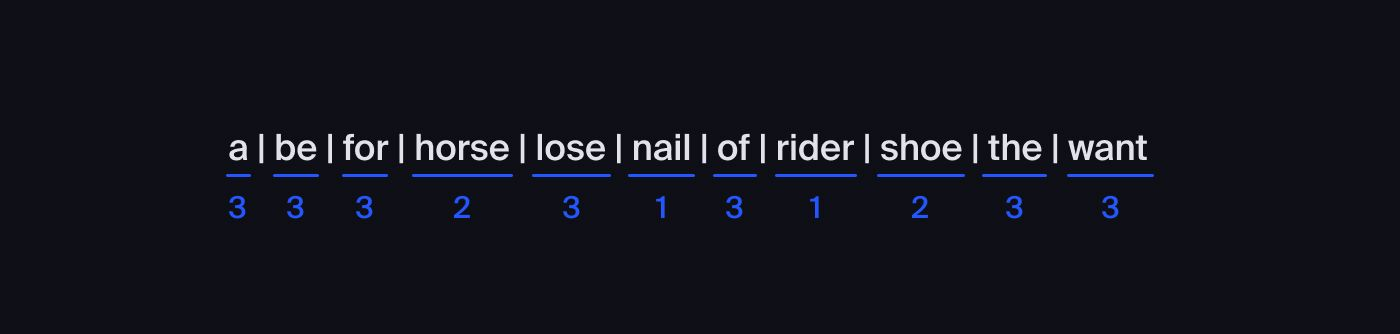

Si construimos un diccionario o vocabulario a partir de nuestro ejemplo y colocamos todas las palabras en orden alfabético, el vector resultante de ocurrencias de cada palabra será:

[3, 3, 3, 2, 3, 1, 3, 1, 2, 3, 3]
Puedes usar Counter para obtener el mismo resultado:

In [ ]:
import spacy
from collections import Counter

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

text = """For want of a nail the shoe was lost. For want of a shoe the horse was lost. For want of a horse the rider was lost."""

doc = nlp(text)

tokens = [token.lemma_ for token in doc if not token.is_punct]

bow = Counter(tokens)

vector = [bow[token] for token in sorted(bow)]

print(vector)

#[3, 3, 3, 2, 3, 1, 3, 1, 2, 3, 3]

Si hay varios textos, la bolsa de palabras los transforma en una matriz. Las filas representan textos y las columnas representan palabras únicas de todos los textos del corpus. Los números en sus intersecciones representan ocurrencias de cada palabra única.

Vamos a usar distintas líneas del mismo proverbio como ejemplo:

Texto 1: for want of a nail the shoe be lose 

Texto 2: for want of a shoe the horse be lose

Texto 3: for want of a horse the rider be lose

         for want of a  nail the shoe be lose horse	rider

Texto 1	  1	  1	   1  1	  1	   1  1	   1    1    0	  0

Texto 2	 1	1	1	1	0	1	1	1	1	1	0

Texto 3	 1	1	1	1	0	1	0	1	1	1	1

La bolsa de palabras puede contener palabras en cualquier orden (por ejemplo, en orden alfabético o en el orden en el que se agregaron a la bolsa). Pero lo importante es que el orden debe ser el mismo para todos los textos (filas de matriz) para que se puedan comparar los vectores.

Pregunta

Aquí hay un corpus. Elige el vector que describe el texto lematizado "por falta de un mensaje":

[
  'for want of a rider the message be lost',
  'for want of a message the battle be lost', 
  'for want of a battle the kingdom be lost',
  'and all for the want of a horseshoe nail'
]
La secuencia de palabras para el vector es la siguiente:

['for', 'want', 'of', 'a', 'rider', 'the', 'message', 'be', 'lost', 'battle', 'kingdom', 'and', 'all', 'horseshoe', 'nail']
[1, 1, 1, 1, 0, 0, 1, 0, 0, 0]

[1, 1, 1, 1, 0, 0, 1]


* [1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
¡Correcto!


[4, 4, 4, 4, 1, 4, 2, 3, 3, 2, 1, 1, 1, 1, 1]


La bolsa de palabras cuenta cada palabra única, pero no considera el orden de las palabras ni las conexiones entre ellas. Por ejemplo, observa este texto lematizado:

Peter travel from Tucson to Vegas

Esta es la lista de palabras: "Peter", "travel", "from", "Tucson, "to", "Vegas" ("Peter," "viaja," "de," "Tucson," "a", "Vegas"). 

Entonces ¿a dónde va Peter? Para responder a la pregunta, veamos las frases o n-gramas.

Un n-grama es una secuencia de varias palabras. N indica el número de elementos y es arbitrario. Por ejemplo, si N=1, tenemos palabras separadas o unigramas. Si N=2, tenemos frases de dos palabras o bigramas. N=3 produce trigramas. Está claro, ¿cierto?

Encontremos todos los trigramas para la oración "Sunset raged like a beautiful bonfire" ("Atardecer ardió como una hermosa fogata").

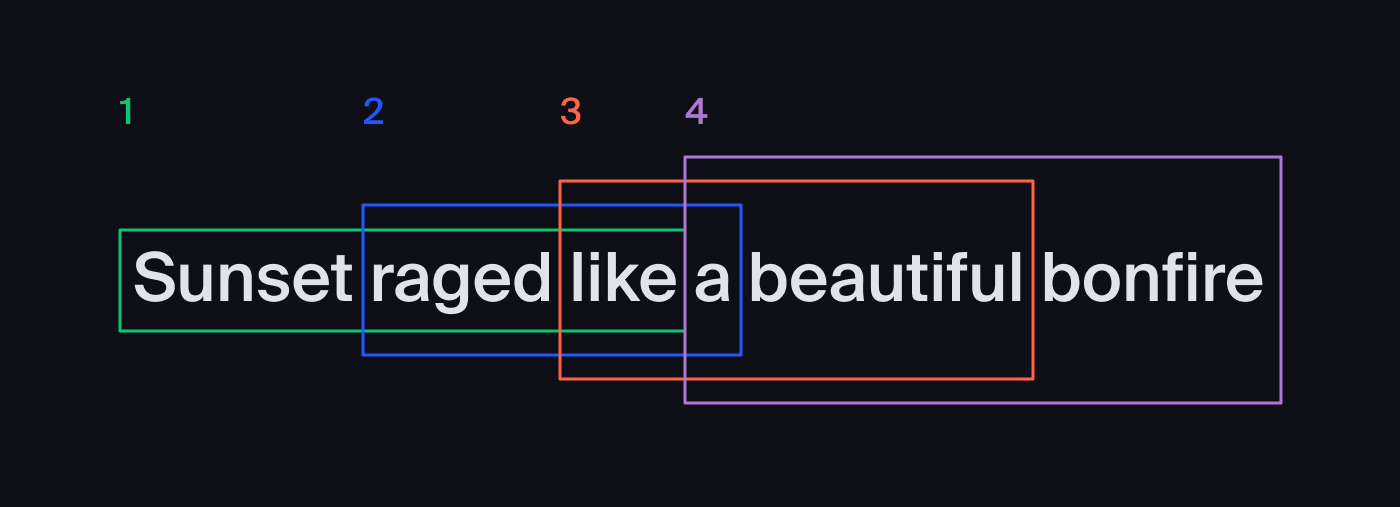

Tenemos cuatro trigramas:  "Sunset raged like", "raged like a", "like a beautiful", "a beautiful bonfire" ("Atardecer ardió como", "ardió como una", "como una hermosa", "una hermosa fogata"). 

La palabra "beautiful" no puede iniciar un trigrama porque solo hay una palabra después de esta y necesitamos dos.

Volvamos con Peter. Encuentra los bigramas en el texto. "Peter travel," "travel from," "from Tuscon," "Tuscon to," "to Vegas." Ahora tenemos las partes A y B del viaje. Peter va de Tuscon a Vegas.

Los n-gramas son similares a las bolsas de palabras porque también se pueden convertir en vectores. Este es el vector para el texto de Peter:

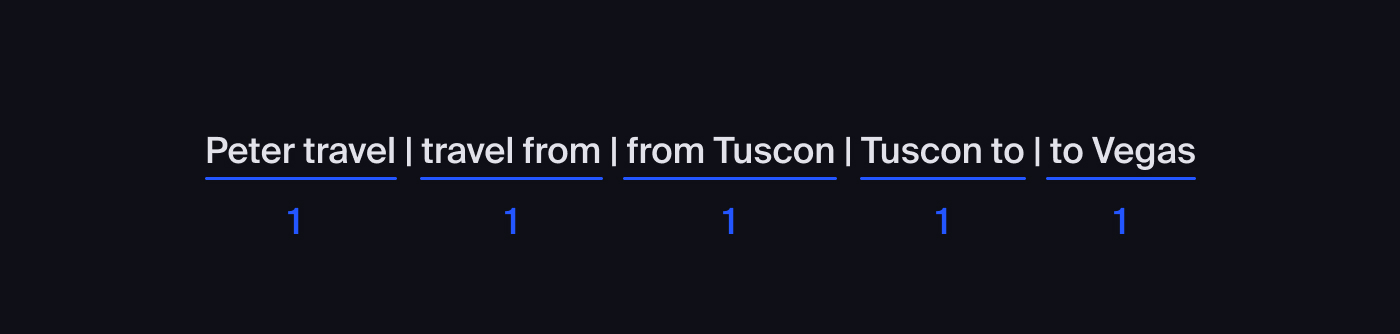

Pregunta

¿Cuántos bigramas podemos obtener de este texto? Ten en cuenta que un bigrama no puede ser interrumpido por un punto.

'It is happening. Bird has landed. Get going.'
7

3

* 5 ¡Correcto!

6
